## Week 3 Day 4 afternoon: Graphs and BFS

## Another algorithm for exploring graphs: Breadth First Search

In [18]:
%run "boaz_utils.ipynb"

In [2]:
def neighbors(G,u):
    return G[u][:]

def isedge(G,u,v):
    for x in neighbors(G, u):
        if x == v:
            return True
    return False

def vertices(G):
    return list(range(len(G)))

def addedge(G,i,j): 
    if not isedge(G, i, j):
        G[i].append(j)
        
def emptygraph(n):
    G = []
    for i in range(n):
        G.append([])
    return G

def undirect(G):
    H = emptygraph(len(G))
    for u in vertices(G):
        for v in neighbors(G, u):
            addedge(H, u, v)
            addedge(H, v, u)
    return H

In [36]:
from collections import deque

# return list of all distances from source to all other vertices
def bfs(source, G):
    vis = [False]*len(G)
    dist = [float('infinity')]*len(G)
    Q = deque()
    Q.append(source)
    vis[source] = True
    dist[source] = 0
    
    while len(Q) > 0:
        u = Q.popleft()
        for v in neighbors(G, u):
            if not vis[v]:
                Q.append(v)
                vis[v] = True
                dist[v] = dist[u] + 1

    return dist

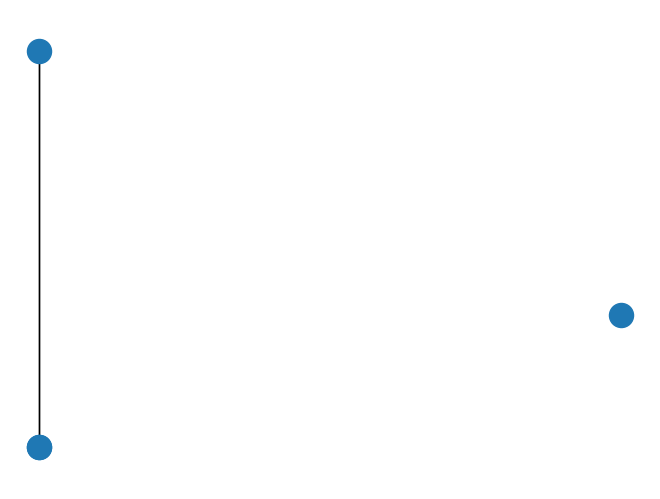

In [37]:
G = undirect([[1],[2],[0],[]])
draw_graph(G)

In [39]:
print(bfs(0, G))

[0, 1, 1, inf]


## Can also use Breadth First Search to find the actual shortest path

In [3]:
from collections import deque

# return list of all distances from source to all other vertices
def bfs(source, target, G):
    visited = [False]*len(G)
    dist = [float('infinity')]*len(G)
    pre = [-1]*len(G)
    Q = deque()

    Q.append(source)
    dist[source] = 0
    visited[source] = True
    
    while len(Q) > 0:
        u = Q.popleft()
        for v in neighbors(G, u):
            if not visited[v]:
                Q.append(v)
                visited[v] = True
                dist[v] = dist[u] + 1
                pre[v] = u
    
    if not visited[target]:
        return None
    else:
        ans = [target]
        while pre[ans[-1]] != -1:
            ans.append(pre[ans[-1]])
        return ans[::-1]

## Example of BFS: word game

In [5]:
file_path = 'words.txt'
with open(file_path, 'r') as file:
    content = file.read()
words = content.split('\n')[:-1]

In [6]:
# make the word graph
W = []
for _ in range(len(words)):
    W.append([])
for i in range(len(words)):
    for j in range(len(words)):
        matches = 0
        for c in range(4):
            if words[i][c] == words[j][c]:
                matches += 1
        if matches == 3:
            W[i].append(j)

In [7]:
# figure out shortest way to get from one 4-letter word to another, changing only one letter at a time
# all intermediate words have to be real words
def word_game(source, target):
    s = -1 # index of source in words
    t = -1 # index of target in words

    for i in range(len(words)):
        if words[i] == source:
            s = i
        if words[i] == target:
            t = i
            
    if s == -1:
        print(source + ' is not a real word')
        return
    elif t == -1:
        print(target + ' is not a real word')
        return
        
    path = bfs(s, t, W)
    if path == None:
        print('Impossible')
    else:
        for w in path:
            print(words[w])

In [10]:
word_game('glue', 'card')

glue
glum
gaum
gaud
baud
bard
card
